In [1]:
import numpy as np 
import pandas as pd 
import re
import json

import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install emoji --upgrade
import emoji

!pip install tweet-preprocessor
import preprocessor as p

!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
all_files = []
for dirname, _, filenames in os.walk('/Users/olgapodolska/Desktop/Ukraine_War/input/'):
    for filename in filenames:
        full_path=os.path.join(dirname, filename)
        all_files.append(full_path)

In [3]:
# sort the files
all_files.sort()
all_files

['/Users/olgapodolska/Desktop/Ukraine_War/input/.DS_Store',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0401_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0402_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0403_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0404_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0405_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0406_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0407_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0408_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0409_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0410_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/o

In [18]:
# fetch all August files - filenames containing "AUG" or "202208"
aug_files = [file for file in all_files if re.search("/08", file)]
aug_files

['/Users/olgapodolska/Desktop/Ukraine_War/input/0801_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0802_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0803_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0804_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0805_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0806_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0807_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0808_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0809_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0810_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/Ukraine_War/input/0811_UkraineCombinedTw

In [19]:
# Unzip the files and concatenate them into one pandas DataFrame
tmp_df_list = []
for file in aug_files:
    print(f"Reading in {file}")
    # unzip and read in the csv file as a dataframe
    tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)
    # append dataframe to temp list
    tmp_df_list.append(tmp_df)

print("Concatenating the DataFrames")
# concatenate the dataframes in the temp list row-wise
aug_df= pd.concat(tmp_df_list, axis=0)
print("Concatenation complete!")

Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0801_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0802_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0803_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0804_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0805_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0806_UkraineCombinedTweetsDeduped.csv.gzip


/Users/olgapodolska/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0807_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0808_UkraineCombinedTweetsDeduped.csv.gzip


/Users/olgapodolska/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0809_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0810_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0811_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/Ukraine_War/input/0812_UkraineCombinedTweetsDeduped.csv.gzip
Concatenating the DataFrames
Concatenation complete!


In [20]:
# show the first 5 rows of the august dataframe
aug_df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",51,3362,71331,2011-09-08 02:34:54.000000,1553893270027063297,2022-08-01 00:00:00.000000,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-01 02:30:13.601013
1,882984605028102144,For2000years,"""I have certain rules I live by. My first rule...",Facing East,2964,4669,119795,2017-07-06 15:28:29.000000,1553893270983409670,2022-08-01 00:00:00.000000,...,56575418,timand2037,0,0,NaN,False,0,0,NaN,2022-08-01 02:30:13.573250
2,862842887565869056,CumanaCandanga,IG: @CumanaCandanga\nEn #Cumaná también somos ...,"Cumana, Venezuela",6033,6730,18870,2017-05-12 01:32:30.000000,1553893271671382024,2022-08-01 00:00:00.000000,...,1441312629155237888,ProfeJesusDavid,0,0,NaN,False,0,0,NaN,2022-08-01 00:29:56.081894
3,1366546460557385729,EnfoquesEnCorto,📻Sigue nuestros cortes informativos 🎙Escúchano...,"Mexico, ME",195,192,20780,2021-03-02 00:30:59.000000,1553893273751666691,2022-08-01 00:00:01.000000,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-01 10:29:39.709724
4,1378766002792583168,kaotiskhund,NaN,NaN,49,8,112,2021-04-04 17:47:00.000000,1553893274687094785,2022-08-01 00:00:01.000000,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-01 06:59:10.496078


In [21]:
# get shape of the DataFrame
print(f"{aug_df.shape[0]} rows and {aug_df.shape[1]} columns")

1849926 rows and 28 columns


In [22]:
# Check data types
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849926 entries, 0 to 59744
Data columns (total 28 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   userid                   int64 
 1   username                 object
 2   acctdesc                 object
 3   location                 object
 4   following                int64 
 5   followers                int64 
 6   totaltweets              int64 
 7   usercreatedts            object
 8   tweetid                  int64 
 9   tweetcreatedts           object
 10  retweetcount             int64 
 11  text                     object
 12  hashtags                 object
 13  language                 object
 14  coordinates              object
 15  favorite_count           int64 
 16  is_retweet               bool  
 17  original_tweet_id        int64 
 18  original_tweet_userid    int64 
 19  original_tweet_username  object
 20  in_reply_to_status_id    int64 
 21  in_reply_to_user_id      int64 
 

In [23]:
# Change the dtypes of usercreatedts, tweetcreatedts, and extractedts to datetime64 for easier operation later
aug_df["usercreatedts"] = pd.to_datetime(aug_df["usercreatedts"])
aug_df["tweetcreatedts"] = pd.to_datetime(aug_df["tweetcreatedts"])
aug_df["extractedts"] = pd.to_datetime(aug_df["extractedts"])

# check dtypes
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849926 entries, 0 to 59744
Data columns (total 28 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   userid                   int64         
 1   username                 object        
 2   acctdesc                 object        
 3   location                 object        
 4   following                int64         
 5   followers                int64         
 6   totaltweets              int64         
 7   usercreatedts            datetime64[ns]
 8   tweetid                  int64         
 9   tweetcreatedts           datetime64[ns]
 10  retweetcount             int64         
 11  text                     object        
 12  hashtags                 object        
 13  language                 object        
 14  coordinates              object        
 15  favorite_count           int64         
 16  is_retweet               bool          
 17  original_tweet_id        int6

In [24]:
# When were the earliest and latest tweets in this dataset created
earliest_tweet = aug_df["tweetcreatedts"].min()
latest_tweet = aug_df["tweetcreatedts"].max()

print(f"The earliest tweet was at {earliest_tweet}, and the latest was at {latest_tweet}")

The earliest tweet was at 2022-08-01 00:00:00, and the latest was at 2022-08-12 23:59:58


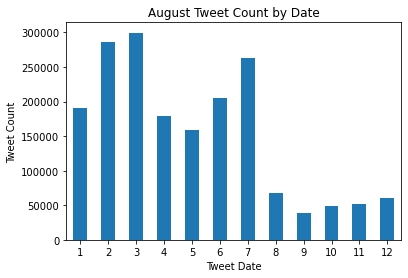

In [25]:
# Visualize tweet frequency by date
# get dates in the dataframe 
dates = aug_df["tweetcreatedts"].dt.day
# group tweet timestamps by date and get tweet count for each date
tweetcount_by_date = aug_df["tweetcreatedts"].groupby(dates).size()

# plot bar graph of tweet count by date
tweetcount_by_date.plot.bar();

plt.title("August Tweet Count by Date")
plt.xlabel("Tweet Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()

In [26]:
# How many languages are in this dataset
print(f"There are {aug_df['language'].nunique()} unique languages in this DataFrame.")
aug_df["language"].unique()

There are 66 unique languages in this DataFrame.


array(['en', 'es', 'zh', 'fr', 'el', 'pl', 'und', 'de', 'it', 'ja', 'nl',
       'ru', 'lv', 'ar', 'uk', 'tr', 'in', 'sr', 'sl', 'ro', 'th', 'fi',
       'pt', 'tl', 'ca', 'da', 'sv', 'ht', 'fa', 'et', 'ta', 'lt', 'hi',
       'iw', 'bn', 'ur', 'vi', 'is', 'cs', 'ko', 'kn', 'te', 'eu', 'no',
       'gu', 'ka', 'my', 'ps', 'bg', 'mr', 'hu', 'am', 'ml', 'cy', 'pa',
       'ckb', 'ne', 'si', 'hy', 'or', 'lo', 'bo', 'sd', 'km', 'ug', 'dv'],
      dtype=object)

In [28]:
# What percentage of the tweets is in English (en)
print(f"{round(aug_df.loc[aug_df['language']=='en'].shape[0]/aug_df.shape[0]*100, 2)}% of the tweets are in English.")

56.76% of the tweets are in English.


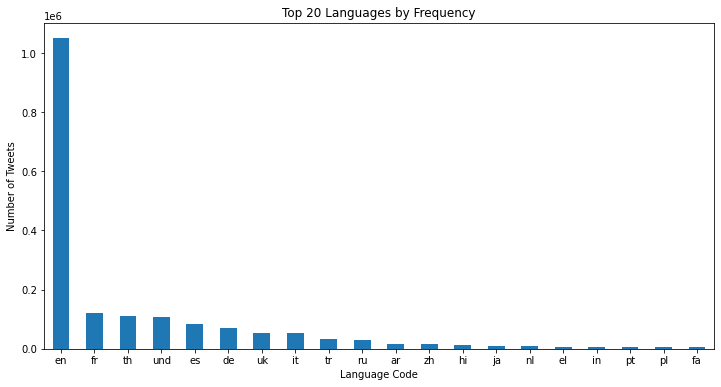

In [30]:
# Plot the distribution of different languages
language_counts = aug_df.groupby("language").size().sort_values(ascending=False)[0:20].plot.bar(figsize=(12,6),
                                                                                         title="Top 20 Languages by Frequency",
                                                                                         xlabel="Language Code",
                                                                                         ylabel="Number of Tweets",
                                                                                         rot=90
                                                                                         );

plt.xticks(rotation=0)
plt.show()

We can see that English (en) was by far the most prevalent language in this dataset, nearing 1.2 million tweets out of 1.96 million. The second and third most prevalent languages were French and Thai, respectively.

Note that the forth most prevalent language was "und", which is used to indicate that Twitter could not detect a language. We can safely inspect English language only.

In [31]:
# Inspect shortest and longest tweets
min_len = aug_df["text"].str.len().min()
max_len = aug_df["text"].str.len().max()


print(f"Shortest tweet has {min_len} chars.")
print(f"Longest tweet has {max_len} chars.")

Shortest tweet has 1 chars.
Longest tweet has 1027 chars.


Hold on, a tweet can have 280 characters max. How could one have more than the limit?

In [33]:
# get index of the tweet that has the max length
max_len_index = aug_df["text"].str.len().idxmax()
# pull out the text of that index
aug_df.loc[max_len_index, "text"]

73894    1xbet her zaman en iyisi ve en çok kazandıranı...
73894    📽️Fields of #Kherson Oblast, destroyed Russian...
73894    Every day more and more war crimes and terrori...
73894    🔴 VIDÉO - "Si la #Chine attaque, c'est la fin ...
73894    #ExpectUs Putin aka Hitler\n\n🇷🇺 Russian NTV T...
73894    "San Fermín, tres años después":\n\nhttps://t....
73894    @HashmatRuhul @mosad42027539 @SinghRakeshKu14 ...
Name: text, dtype: object

Upon research, mentions supposedly do not count toward the character limit when the tweet is a reply.

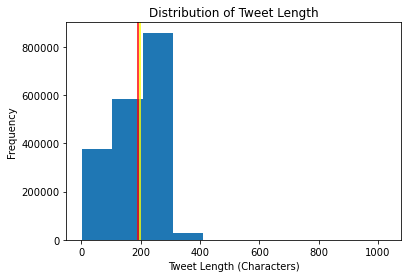

Mean: 192.23341690424374 chars
Median: 199.0 chars
Standard deviation: 86.09440823148087 chars


In [34]:
# Check the distribution of tweet lengths
tweet_len_series = aug_df["text"].str.len()
tweet_len_series.plot.hist();
plt.title("Distribution of Tweet Length")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
# draw a vertical line for the mean
plt.axvline(x=tweet_len_series.mean(), color="red")
# draw a vertical line for the median
plt.axvline(x=tweet_len_series.median(), color="yellow")
plt.show()

print(f"Mean: {tweet_len_series.mean()} chars")
print(f"Median: {tweet_len_series.median()} chars")
print(f"Standard deviation: {tweet_len_series.std()} chars")

The distribution is right-skewed. Most tweets appear to be below 300 characers in length. But because we have a few outlying tweets that have anomalously long lengths, as investigated above, the histogram has an elongated x-axis